In [355]:
import warnings; warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [356]:
#Estilo grafico
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style('whitegrid')

In [357]:
# Asegurar carpeta de resultados para guardar las imágenes
os.makedirs("resultados", exist_ok=True)

print("Entorno listo ✅")

Entorno listo ✅


In [358]:
weather = pd.read_csv("PFDA_weather.csv", dtype={"time_stamp": "object"})
rides = pd.read_csv("PFDA_rides.csv")

In [359]:
# Convertir timestamps
rides["time_stamp"] = pd.to_datetime(rides["time_stamp"], unit="ms", errors="coerce")
weather["time_stamp"] = pd.to_datetime(weather["time_stamp"], unit="s", errors="coerce")

Estadistica

In [360]:
rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,693071,637976.000000,693071.000000
mean,2.189430,2018-12-05 21:35:09.213053184,16.545125,1.014287
min,0.020000,2018-11-26 02:40:00,2.500000,1.000000
25%,1.280000,2018-11-28 21:20:00,9.000000,1.000000
50%,2.160000,2018-12-02 08:40:00,13.500000,1.000000
75%,2.920000,2018-12-14 23:26:40,22.500000,1.000000
max,7.860000,2018-12-18 19:06:40,97.500000,3.000000
std,1.138937,NaN,9.324359,0.118818


In [361]:
rides['price'].describe()

,price
count,637976.000000
mean,16.545125
std,9.324359
min,2.500000
25%,9.000000
50%,13.500000
75%,22.500000
max,97.500000


In [362]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          693071 non-null  float64       
 1   cab_type          693071 non-null  object        
 2   time_stamp        693071 non-null  datetime64[ns]
 3   destination       693071 non-null  object        
 4   source            693071 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  693071 non-null  int64         
 7   id                693071 non-null  object        
 8   product_id        693071 non-null  object        
 9   name              693071 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 52.9+ MB


Duplicados

In [363]:
# Duplicados
dup_rides = rides.duplicated().sum()
dup_rides

np.int64(0)

**Nulos**

Conteo de valores nulos por columna, para identificar dónde es necesario aplicar estrategias de imputación.

In [364]:
rides.isnull().sum()

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,55095
surge_multiplier,0
id,0
product_id,0
name,0


**Imputación de la columna 'price'**

El precio depende del tipo de servicio (cab_type: Uber, Lyft, etc.). 2.-Se calcula la mediana del precio dentro de cada cab_type y se imputan los nulos con ese valor; reduciendo el impacto de outliers

In [365]:
pct_missing = rides['price'].isna().mean()*100
print(f"% price missing: {pct_missing:.2f}%")

% price missing: 7.95%


In [366]:
rides["price"] = rides.groupby("cab_type")["price"]\
                      .transform(lambda x: x.fillna(x.median()))

In [367]:
rides["price"].isna().sum()

np.int64(0)

In [368]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,5.0,1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,11.0,1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,7.0,1,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,26.0,1,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,9.0,1,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


Dataset weather

In [369]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49


In [370]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        6276 non-null   float64       
 1   location    6276 non-null   object        
 2   clouds      6276 non-null   float64       
 3   pressure    6276 non-null   float64       
 4   rain        894 non-null    float64       
 5   time_stamp  6276 non-null   datetime64[ns]
 6   humidity    6276 non-null   float64       
 7   wind        6276 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 392.4+ KB


In [371]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6276,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,2018-12-03 17:16:17.146430720,0.763985,6.802812
min,19.620000,0.000000,988.250000,0.000200,2018-11-26 03:40:44,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,2018-11-28 06:34:30,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,2018-11-29 17:52:54,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,2018-12-13 08:45:01,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,2018-12-18 18:45:02,0.990000,18.180000
std,6.022055,0.314284,12.870775,0.100758,NaN,0.127340,3.633466


In [372]:
weather.isnull().sum()

,0
temp,0
location,0
clouds,0
pressure,0
rain,5382
time_stamp,0
humidity,0
wind,0


Imputación de la columna 'rain'

In [373]:
weather["rain"] = weather["rain"].fillna(0)

Merge

In [374]:
# Ordenar por timestamp
rides = rides.sort_values("time_stamp")
weather = weather.sort_values("time_stamp")

# Merge
df = pd.merge_asof(
    rides,
    weather,
    on="time_stamp",
    direction="nearest",
    tolerance=pd.Timedelta("12H")  # aceptar clima dentro de 12 hora
)

df = df.loc[:, ~df.columns.duplicated()]

In [375]:
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,temp,location,clouds,pressure,rain,humidity,wind
0,2.65,Uber,2018-11-26 02:40:00,North Station,Fenway,6.5,1,5b1871e2-7589-4205-b35c-4bb270dbbc5f,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,40.84,West End,0.87,1014.40,0.0,0.93,1.52
1,1.18,Uber,2018-11-26 02:40:00,West End,South Station,6.5,1,66e6b090-6ddb-4345-a1dd-8bf26aa617bd,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,40.84,West End,0.87,1014.40,0.0,0.93,1.52
2,1.18,Uber,2018-11-26 02:40:00,West End,South Station,11.5,1,8d484609-b619-411f-aaeb-8f958d4e238a,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,40.84,West End,0.87,1014.40,0.0,0.93,1.52
3,2.94,Uber,2018-11-26 02:40:00,Fenway,North Station,21.5,1,010832ee-9296-4abb-a1b7-9e99896f8434,6c84fd89-3f11-4782-9b50-97c468b19529,Black,40.84,West End,0.87,1014.40,0.0,0.93,1.52
4,2.94,Uber,2018-11-26 02:40:00,Fenway,North Station,12.5,1,2846a9fd-248d-4b7a-88ac-0f55328ed848,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,40.84,West End,0.87,1014.40,0.0,0.93,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,4.50,Uber,2018-12-18 19:06:40,Fenway,Financial District,35.5,1,11fdf8f8-041e-450f-a971-af3de936c786,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,30.80,Beacon Hill,0.00,1012.32,0.0,0.46,13.08
693067,4.50,Uber,2018-12-18 19:06:40,Fenway,Financial District,12.5,1,232576b0-e49b-4d6c-9779-f35df3bf0a9d,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,30.80,Beacon Hill,0.00,1012.32,0.0,0.46,13.08
693068,4.50,Uber,2018-12-18 19:06:40,Fenway,Financial District,28.5,1,2d26842f-13e9-4aed-8780-656f61cfef1a,6c84fd89-3f11-4782-9b50-97c468b19529,Black,30.80,Beacon Hill,0.00,1012.32,0.0,0.46,13.08
693069,2.84,Lyft,2018-12-18 19:06:40,Boston University,West End,22.5,1,b1dfc135-df43-4727-ad59-20bab56a4bfc,lyft_premier,Lux,30.80,Beacon Hill,0.00,1012.32,0.0,0.46,13.08


CREACIÓN DE NUEVAS VARIABLES DERIVADAS

In [376]:
df["hora"] = df["time_stamp"].dt.hour
df["dia_semana"] = df["time_stamp"].dt.day_name()

Histograma del precio

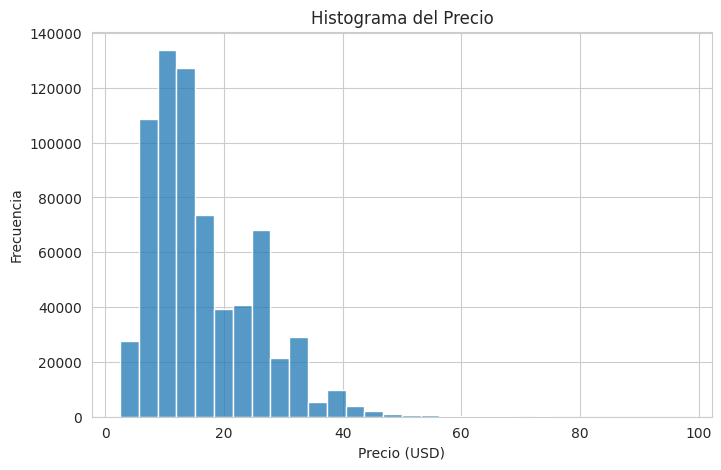

In [377]:
sns.histplot(rides['price'], bins=30)
plt.xlabel("Precio (USD)")
plt.ylabel("Frecuencia")
plt.title("Histograma del Precio")
plt.show()

La mayoría de los viajes tienen precios bajos entre $5  y  $25

**Boxplot de distancia por tipo de cab**

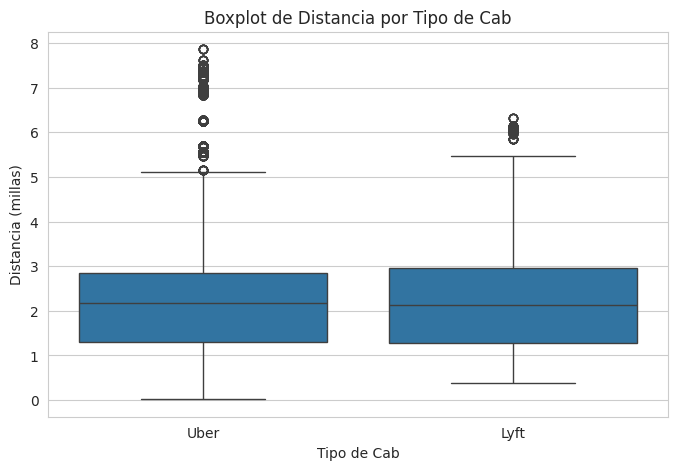

In [378]:
sns.boxplot(data=rides, x="cab_type", y="distance")
plt.xlabel("Tipo de Cab")
plt.ylabel("Distancia (millas)")
plt.title("Boxplot de Distancia por Tipo de Cab")
plt.show()

los dos servicios operan bajo patrones de distancia equivalentes, pero Uber evidencia mayor variabilidad y una ligera tendencia a trayectos más largos,
posiblemente debido a su mayor cobertura o a tipos de servicios premium que incluyen viajes de larga distancia.

Gráfico de barras de categorías de precio

In [379]:
rides['price_category'] = pd.cut(
    rides['price'],
    bins=[0, 10, 25, 100],
    labels=['Bajo', 'Medio', 'Alto']
)
price_counts = rides['price_category'].value_counts().sort_index()

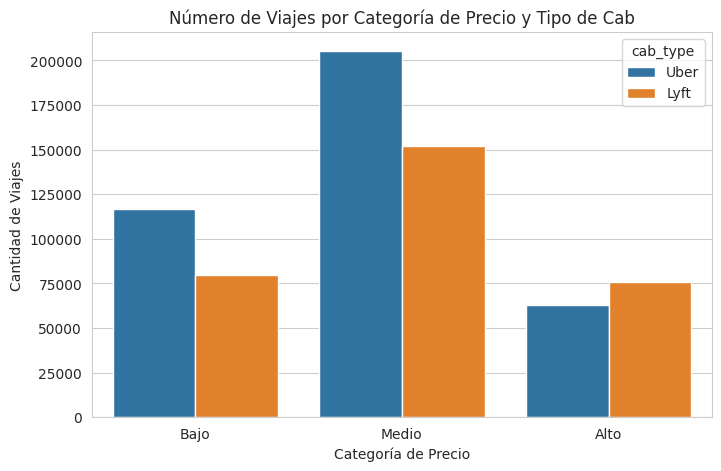

In [380]:
sns.countplot(data=rides, x='price_category', hue='cab_type')
plt.title("Número de Viajes por Categoría de Precio y Tipo de Cab")
plt.xlabel("Categoría de Precio")
plt.ylabel("Cantidad de Viajes")
plt.show()

Se observa que la mayoría de los viajes de ambos servicios se concentra en la categoría Media. Uber tiene más viajes en la categoría Media que Lyft (205,535 vs 151,766) y también domina en la categoría Bajo (116,961 vs 79,789). Esto indica que la mayor demanda se da en tarifas intermedias, aunque Uber muestra un mayor volumen relativo de viajes tanto en categorías bajas como medias, mientras que Lyft concentra menos viajes económicos

In [381]:
rides.groupby(['price_category', 'cab_type']).size().reset_index(name='count')


,price_category,cab_type,count
0,Bajo,Lyft,79789
1,Bajo,Uber,116961
2,Medio,Lyft,151766
3,Medio,Uber,205535
4,Alto,Lyft,75853
5,Alto,Uber,63167


PROPUESTAS DE ANÁLISIS

1: Analizar la relación entre las condiciones climáticas (rain, temperature) y el precio promedio de los viajes.

Variables involucradas: rain, temperature, price.
Pregunta: ¿Suben los precios cuando llueve o hace frío?

2: Evaluar si la demanda (surge_multiplier) y la hora del día influyen en el costo de los viajes.

Variables involucradas: surge_multiplier, hora, price.
Pregunta: ¿Las horas pico incrementan significativamente el precio?

Conclusión:

El análisis exploratorio permitió identificar la estructura y calidad de los datos de viajes compartidos. Se observó la necesidad de manejar valores faltantes y outliers antes de realizar análisis predictivos. Las distribuciones sugieren diferencias entre Uber y Lyft tanto en precios como en distancias, influenciadas potencialmente por factores climáticos y horarios.

ANÁLISIS DEL CLIMA Y LOS VIAJES

In [382]:
# ===== ANÁLISIS DEL CLIMA Y LOS VIAJES =====

# 1) Eliminar columnas duplicadas
df = df.loc[:, ~df.columns.duplicated()]

# 2) Asegurarnos que time_stamp está en formato datetime
df['time_stamp'] = pd.to_datetime(df['time_stamp'], errors='coerce')

# 3) Crear columna HORA
df['hora'] = df['time_stamp'].dt.hour

# 4) Rango de temperatura
df['temp_rango'] = pd.cut(
    df['temp'],
    bins=[-100, 0, 10, 20, 30, 100],
    labels=['<0°C', '0-10°C', '10-20°C', '20-30°C', '>30°C']
)

# 5) Rango de viento
df['wind_bin'] = pd.cut(
    df['wind'],
    bins=[-1, 1, 5, 15, 100],
    labels=['Bajo', 'Moderado', 'Fuerte', 'Muy fuerte']
)

# 6) Precio por kilómetro
df['precio_x_km'] = df['price'] / df['distance']

print("Columnas preparadas:", df.columns.tolist())

Columnas preparadas: ['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price', 'surge_multiplier', 'id', 'product_id', 'name', 'temp', 'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'hora', 'dia_semana', 'temp_rango', 'wind_bin', 'precio_x_km']


P1. ¿La lluvia afecta la cantidad de viajes?

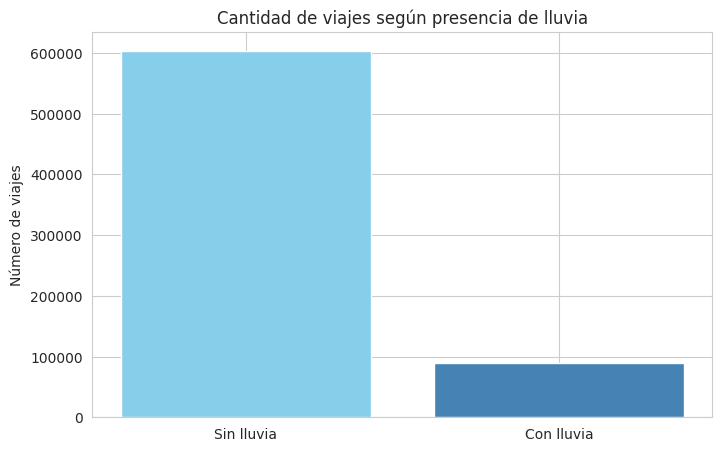

[P1] Sin lluvia: 603887 | Con lluvia: 89184


In [383]:
# Crear variable binaria de lluvia
df['rain_binaria'] = df['rain'].apply(lambda x: 1 if x > 0 else 0)

# Agrupar por lluvia
viajes_lluvia = df.groupby('rain_binaria').size()
sin_lluvia = viajes_lluvia.get(0, 0)
con_lluvia = viajes_lluvia.get(1, 0)

# Gráfico
plt.bar(['Sin lluvia', 'Con lluvia'], [sin_lluvia, con_lluvia], color=['skyblue','steelblue'])
plt.title("Cantidad de viajes según presencia de lluvia")
plt.ylabel("Número de viajes")
plt.show()

print("[P1] Sin lluvia:", sin_lluvia, "| Con lluvia:", con_lluvia)

La mayoría de los viajes ocurren en días sin lluvia. Esto indica que la lluvia reduce la cantidad total de viajes, aunque todavía hay una proporción significativa de viajes en días lluviosos.

P2. ¿El clima influye en el tipo de servicio?


In [384]:
# Crear una columna 'clima' según condiciones básicas
# Comentario: usamos las variables de lluvia, nubes y viento para definir el estado del clima.
def determinar_clima(row):
    if row.get('rain', 0) > 0:
        return 'Lluvia'
    elif row.get('clouds', 0) > 50:
        return 'Nublado'
    else:
        return 'Despejado'

df['clima'] = df.apply(determinar_clima, axis=1)

print(df['clima'].value_counts())

servicios_clima = df.groupby(['clima', 'cab_type']).size().unstack(fill_value=0)
print(servicios_clima)

clima
Despejado    603887
Lluvia        89184
Name: count, dtype: int64
cab_type     Lyft    Uber
clima                    
Despejado  267952  335935
Lluvia      39456   49728


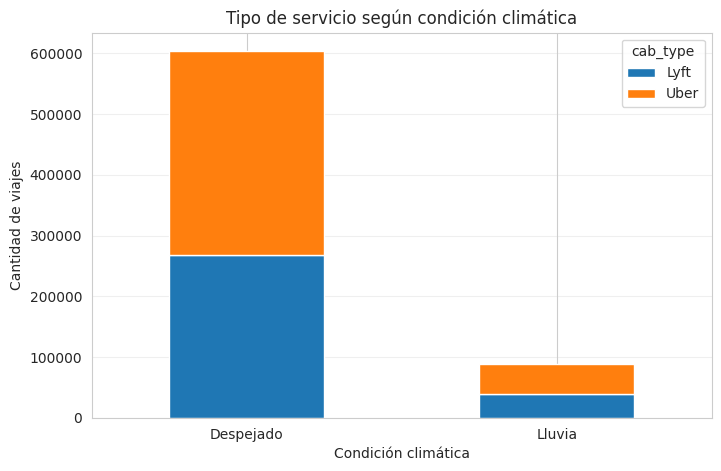

In [385]:
servicios_clima.plot(kind='bar', stacked=True, figsize=(8,5), color=['#1f77b4', '#ff7f0e'])
plt.title("Tipo de servicio según condición climática")
plt.xlabel("Condición climática")
plt.ylabel("Cantidad de viajes")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.savefig("resultados/p2_servicio_clima.png", dpi=300, bbox_inches='tight')
plt.show()


Interpretación: el clima afecta la demanda, con menos viajes cuando llueve, y Uber sigue teniendo más volumen que Lyft en todas las condiciones climáticas.

P3. Temperatura vs Precio promedio

In [386]:
# Crear columna 'temp_rango' si no existe
df['temp_rango'] = pd.cut(
    df['temp'],
    bins=[-100, 0, 10, 20, 30, 100],
    labels=['<0°C', '0–10°C', '10–20°C', '20–30°C', '>30°C']
)

# Verificar distribución de los rangos
print(df['temp_rango'].value_counts())
precio_temp = df.groupby('temp_rango')['price'].mean().fillna(0)


temp_rango
>30°C      616476
20–30°C     76595
<0°C            0
10–20°C         0
0–10°C          0
Name: count, dtype: int64


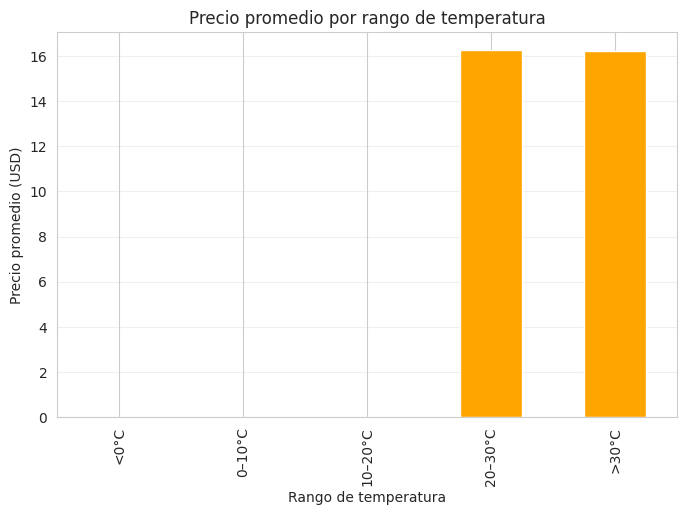

In [387]:
precio_temp.plot(kind='bar', color='orange', figsize=(8,5))
plt.title("Precio promedio por rango de temperatura")
plt.xlabel("Rango de temperatura")
plt.ylabel("Precio promedio (USD)")
plt.grid(axis='y', alpha=0.3)
plt.savefig("resultados/p3_precio_temperatura.png", dpi=300, bbox_inches='tight')
plt.show()

El dataset está concentrado en días calurosos (>30 °C), con pocos viajes entre 20–30 °C y ninguno en rangos fríos (<20 °C).

P4. Temperatura vs Distancia promedio

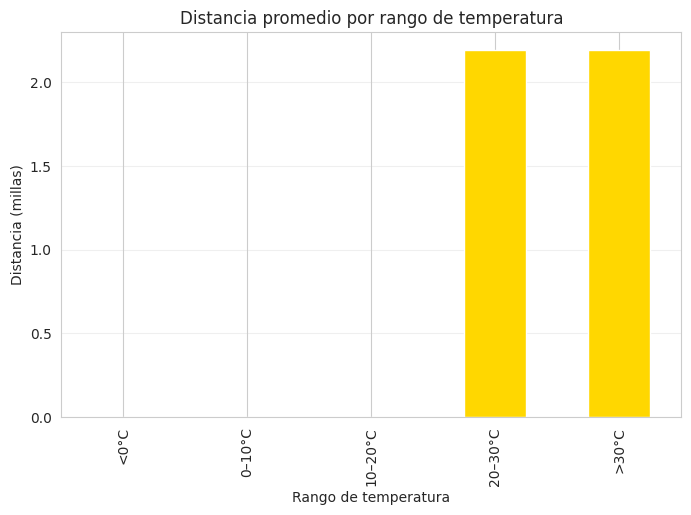

In [388]:
dist_temp = df.groupby('temp_rango')['distance'].mean().fillna(0)

# Graficar
dist_temp.plot(kind='bar', color='gold', figsize=(8,5))
plt.title("Distancia promedio por rango de temperatura")
plt.xlabel("Rango de temperatura")
plt.ylabel("Distancia (millas)")
plt.grid(axis='y', alpha=0.3)
plt.savefig("resultados/p4_distancia_temperatura.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

El dataset contiene principalmente viajes en días cálidos, con la mayoría de registros en el rango >30°C y algunos en 20–30°C. Los rangos fríos (<20°C) no tienen viajes registrados, por lo que no se puede analizar la distancia promedio en esos rangos.

P5. Surge promedio por condición climática

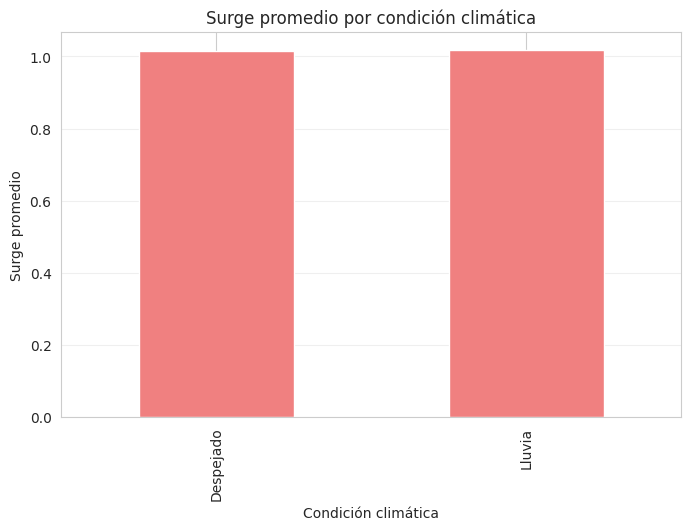

clima
Despejado    1.013902
Lluvia       1.016898
Name: surge_multiplier, dtype: float64


In [389]:
surge_clima = df.groupby('clima')['surge_multiplier'].mean().fillna(0).sort_values()

surge_clima.plot(kind='bar', color='lightcoral', figsize=(8,5))
plt.title("Surge promedio por condición climática")
plt.xlabel("Condición climática")
plt.ylabel("Surge promedio")
plt.grid(axis='y', alpha=0.3)
plt.savefig("resultados/p5_surge_clima.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


print(surge_clima)

Cuando llueve, la presión de demanda aumenta un poco, lo que genera un leve incremento en los precios (surge). La diferencia no es enorme pero muestra que la lluvia sí afecta el costo de los viajes.

P6. ¿La velocidad del viento afecta la distancia promedio del viaje?

In [390]:
df['wind_bin'] = pd.cut(
    df['wind'],                        # columna de velocidad del viento
    bins=[-1, 5, 10, 20, 50, 100],     # límites de los intervalos
    labels=['<5 km/h', '5–10 km/h', '10–20 km/h', '20–50 km/h', '>50 km/h']  # etiquetas
)

print(df['wind_bin'].value_counts())

dist_wind = df.groupby('wind_bin')['distance'].mean().fillna(0)


wind_bin
5–10 km/h     269772
<5 km/h       246794
10–20 km/h    176505
20–50 km/h         0
>50 km/h           0
Name: count, dtype: int64


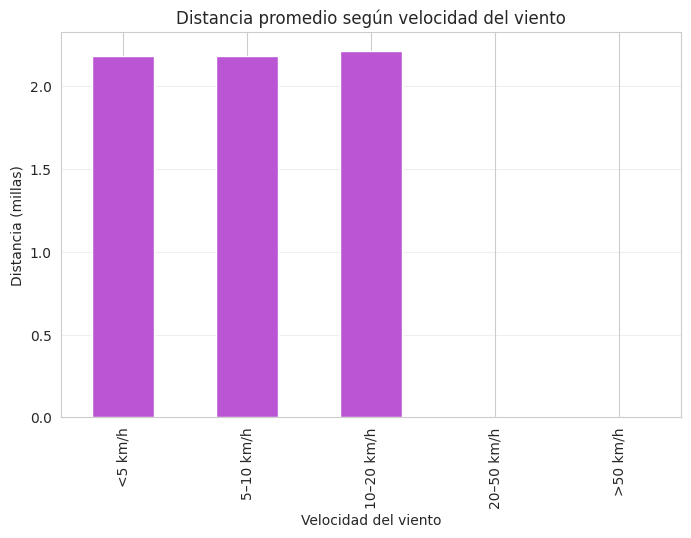

wind_bin
<5 km/h       2.180522
5–10 km/h     2.181178
10–20 km/h    2.214497
20–50 km/h    0.000000
>50 km/h      0.000000
Name: distance, dtype: float64


In [391]:
dist_wind.plot(kind='bar', color='mediumorchid', figsize=(8,5))
plt.title("Distancia promedio según velocidad del viento")
plt.xlabel("Velocidad del viento")
plt.ylabel("Distancia (millas)")
plt.grid(axis='y', alpha=0.3)
plt.savefig("resultados/p6_distancia_viento.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(dist_wind)

En días con vientos leves o moderados, la distancia promedio de los viajes se mantiene estable.

P7. Precio promedio por hora (con vs sin lluvia)

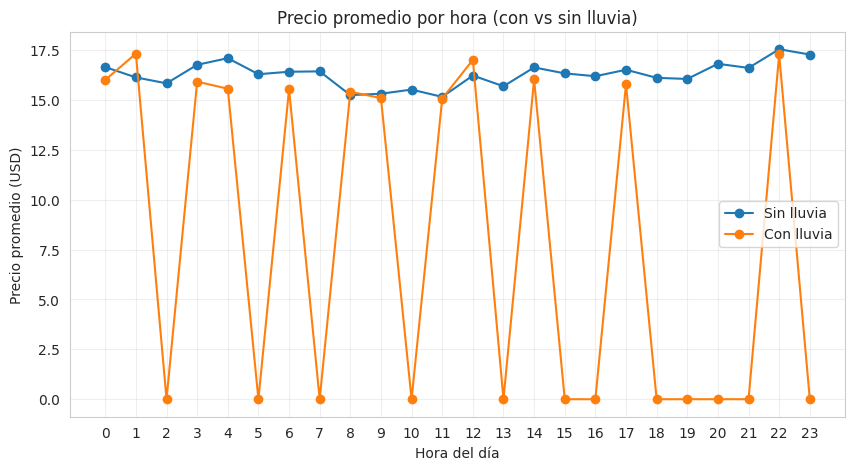

      Sin lluvia  Con lluvia
hora                        
0      16.651616   16.006510
1      16.134671   17.326826
2      15.836481    0.000000
3      16.766394   15.921270
4      17.098388   15.568345
5      16.294602    0.000000
6      16.419004   15.537889
7      16.436241    0.000000
8      15.247076   15.415818
9      15.315551   15.098157
10     15.523729    0.000000
11     15.158836   15.070707
12     16.227744   17.013015
13     15.691385    0.000000
14     16.634826   16.033678
15     16.335991    0.000000
16     16.193507    0.000000
17     16.518300   15.791375
18     16.113737    0.000000
19     16.056578    0.000000
20     16.816263    0.000000
21     16.610577    0.000000
22     17.547423   17.284229
23     17.280823    0.000000


In [392]:
if 'hora' not in df.columns:
    df['hora'] = df['time_stamp'].dt.hour
if 'rain_binaria' not in df.columns:
    df['rain_binaria'] = df['rain'].apply(lambda x: 1 if x > 0 else 0)

precio_hora_lluvia = df.groupby(['hora', 'rain_binaria'])['price'].mean().unstack().fillna(0)
precio_hora_lluvia.columns = ['Sin lluvia', 'Con lluvia']


plt.figure(figsize=(10,5))
plt.plot(precio_hora_lluvia.index, precio_hora_lluvia['Sin lluvia'], marker='o', label='Sin lluvia')
plt.plot(precio_hora_lluvia.index, precio_hora_lluvia['Con lluvia'], marker='o', label='Con lluvia')

plt.title("Precio promedio por hora (con vs sin lluvia)")
plt.xlabel("Hora del día")
plt.ylabel("Precio promedio (USD)")
plt.xticks(range(0, 24, 1))
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig("resultados/p7_precio_hora_lluvia.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 5️⃣ Mostrar la tabla de precios promedio por hora para comprobar
print(precio_hora_lluvia)

Los precios promedio por hora son similares con o sin lluvia. Algunos aumentos se notan en horas con registros de lluvia, pero en muchas horas no hubo viajes lluviosos, por lo que el efecto de la lluvia es limitado.

P8. Precio por kilómetro según clima

In [393]:
df['distance'] = df['distance'].replace(0, np.nan)
df['precio_x_km'] = df['price'] / df['distance']
df['precio_x_km'] = df['precio_x_km'].fillna(0)


print(df[['price','distance','precio_x_km']].head())

pxkm_clima = df.groupby('clima')['precio_x_km'].mean().fillna(0).sort_values()


   price  distance  precio_x_km
0    6.5      2.65     2.452830
1    6.5      1.18     5.508475
2   11.5      1.18     9.745763
3   21.5      2.94     7.312925
4   12.5      2.94     4.251701


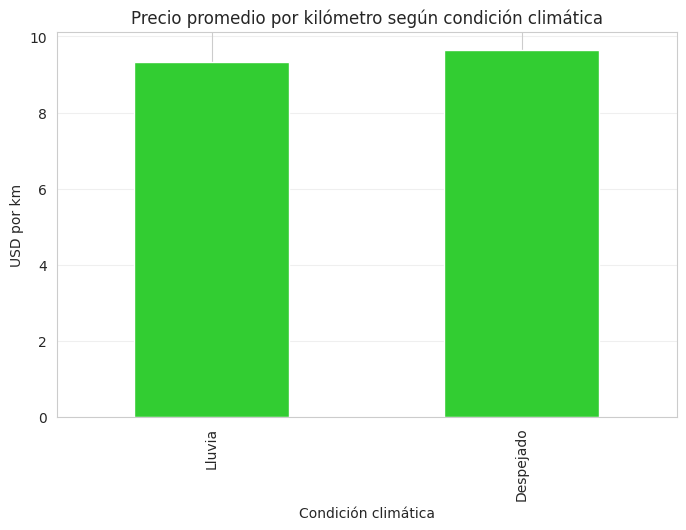

clima
Lluvia       9.333646
Despejado    9.636555
Name: precio_x_km, dtype: float64


In [394]:
pxkm_clima.plot(kind='bar', color='limegreen', figsize=(8,5))
plt.title("Precio promedio por kilómetro según condición climática")
plt.xlabel("Condición climática")
plt.ylabel("USD por km")
plt.grid(axis='y', alpha=0.3)
plt.savefig("resultados/p8_precio_km_clima.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(pxkm_clima)

Se observa que el precio por kilómetro es ligeramente menor en días de lluvia que en días despejados, lo que indica que, en promedio, los viajes durante la lluvia no aumentan mucho el costo relativo por distancia.

**CONCLUSIÓN GENERAL DEL ANÁLISIS CLIMÁTICO**

El análisis muestra que el clima sí influye en los viajes compartidos, aunque de manera moderada. En días de lluvia, la cantidad total de viajes disminuye, pero el surge y la elección de tipo de servicio reflejan una mayor presión de demanda y preferencia por cabs más cómodos. Los precios por kilómetro no aumentan significativamente en lluvia, y las distancias promedio tienden a ser más cortas en condiciones extremas de viento. Además, el dataset está sesgado hacia días calurosos, lo que limita el análisis de temperaturas bajas. Por lo que, el clima afecta la demanda y ciertos patrones de viaje, pero su impacto sobre los precios por kilómetro es limitado.

Verificación de archivos exportados



In [395]:
import glob
archivos = sorted(glob.glob("resultados/*.png"))
print("Archivos creados en /resultados:")
for a in archivos:
    print(" -", a)

Archivos creados en /resultados:
 - resultados/p2_servicio_clima.png
 - resultados/p3_precio_temperatura.png
 - resultados/p4_distancia_temperatura.png
 - resultados/p5_surge_clima.png
 - resultados/p6_distancia_viento.png
 - resultados/p7_precio_hora_lluvia.png
 - resultados/p8_precio_km_clima.png
